# K-mer filtering, 07/04/20

## Intro
Here are some plots showing the progress on information-based k-mer filtering. At the moment, RAPPAS2 supports 3 types of filtering:
- entropy filter
- max deviation filter
- max difference filter

Every filtering function applied to the distribution of scores (*true* scores, not *log*-scores) of a k-mer. The mu parameter `0 <= mu <= 1` regulates the percentile of best k-mers to keep based on their filtering function value.
Thus, `mu` of 0 will discard all k-mers, `mu` of 1 will keep all k-mers, `mu` of 0.5 will keep half of them.


## Entropy filtering

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns

In [17]:
filename = "/home/nikolai/dev/datasets/example_6/pewo_likelihood/summary_table_LL_rappas2.csv"
df_rappas = pd.read_csv(filename, sep=";")
df_rappas["software"] = "rappas"

In [13]:
df_rappas[:5]

,length,k,o,red,ar,mu,likelihood,software
0,0,7,1.5,0.99,PHYML,0.3,-39733.543069,rappas
1,0,8,1.5,0.99,PHYML,0.3,-39733.753145,rappas
2,0,7,2.0,0.99,PHYML,0.3,-39733.716353,rappas
3,0,8,2.0,0.99,PHYML,0.3,-39733.690465,rappas
4,0,7,1.5,0.99,PHYML,0.4,-39733.564749,rappas


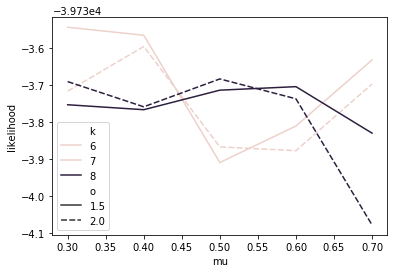

In [5]:
sns.lineplot(x="mu", y="likelihood", data=df_rappas, hue="k", style="o")

Let's compare the average likelihood values with the value produced by EPA:

In [18]:
filename = "/home/nikolai/dev/datasets/example_6/pewo_likelihood/summary_table_LL_epa.csv"
df_epa = pd.read_csv(filename, sep=";")
df_epa["software"] = "epa"
df_epa

,length,g,likelihood,software
0,0,0.01,-39731.275482,epa


In [14]:
df_all = pd.concat([df_epa, df_rappas], sort=False)
df_all[:5]

,length,g,likelihood,software,k,o,red,ar,mu
0,0,0.01,-39731.275482,epa,NaN,NaN,NaN,NaN,NaN
0,0,NaN,-39733.543069,rappas,7.0,1.5,0.99,PHYML,0.3
1,0,NaN,-39733.753145,rappas,8.0,1.5,0.99,PHYML,0.3
2,0,NaN,-39733.716353,rappas,7.0,2.0,0.99,PHYML,0.3
3,0,NaN,-39733.690465,rappas,8.0,2.0,0.99,PHYML,0.3


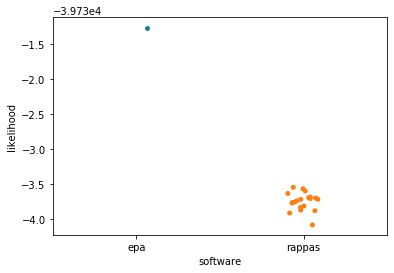

In [9]:
sns.stripplot(x="software", y="likelihood", data=df_all)

Entropy filtering does not bring the values much closer to EPA's ones. Let's have a closer look to the RAPPAS cluster.

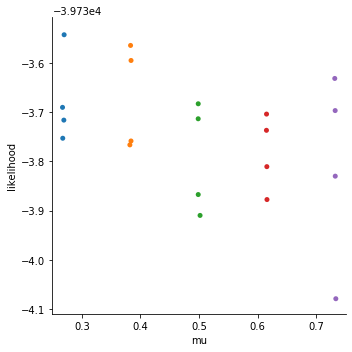

In [10]:
sns.catplot(x="mu", y="likelihood", hue="mu", dodge=True, data=df_rappas)

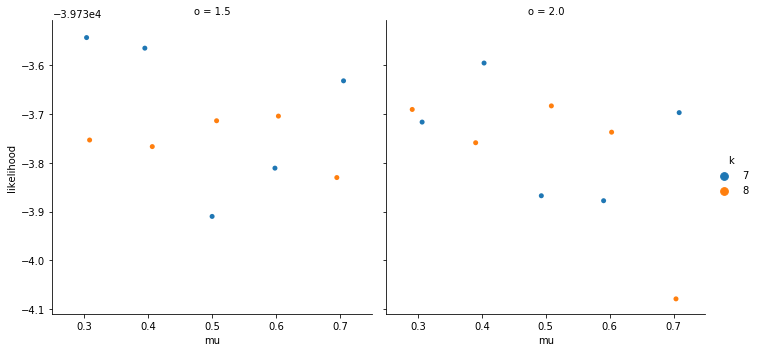

In [11]:
sns.catplot(x="mu", y="likelihood", hue="k", col="o", data=df_rappas)

## Max deviation filtering


In [21]:
filename = "/home/nikolai/dev/datasets/example_6/pewo_likelihood_dev/summary_table_LL_rappas2.csv"
df_rappas = pd.read_csv(filename, sep=";")
df_rappas["software"] = "rappas"

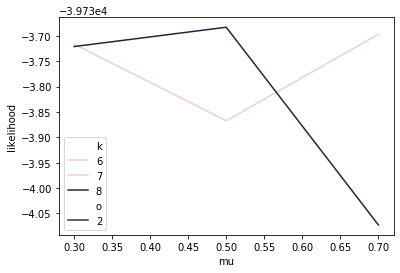

In [22]:
sns.lineplot(x="mu", y="likelihood", data=df_rappas, hue="k", style="o")

In [23]:
df_all = pd.concat([df_epa, df_rappas], sort=False)
df_all[:5]

,length,g,likelihood,software,k,o,red,ar,mu
0,0,0.01,-39731.275482,epa,NaN,NaN,NaN,NaN,NaN
0,0,NaN,-39733.716353,rappas,7.0,2.0,0.99,PHYML,0.3
1,0,NaN,-39733.721231,rappas,8.0,2.0,0.99,PHYML,0.3
2,0,NaN,-39733.867445,rappas,7.0,2.0,0.99,PHYML,0.5
3,0,NaN,-39733.683176,rappas,8.0,2.0,0.99,PHYML,0.5


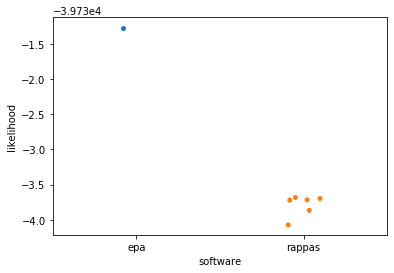

In [24]:
sns.stripplot(x="software", y="likelihood", data=df_all)

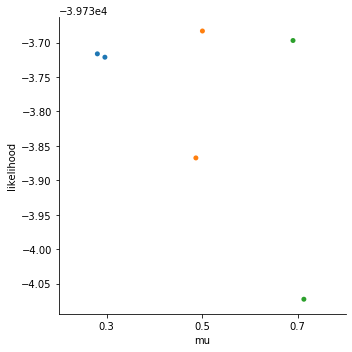

In [27]:
sns.catplot(x="mu", y="likelihood", hue="mu", data=df_rappas)

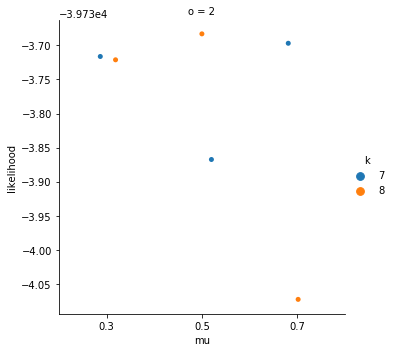

In [26]:
sns.catplot(x="mu", y="likelihood", hue="k", col="o", data=df_rappas)